In [5]:
import pandas as pd

pd.read_parquet('../data/processed/128x128_v1_0.parquet')

ArrowInvalid: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
PROJECT_PATH = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
RAW_DATA_PATH = PROJECT_PATH + '/data/raw/CheXpert-v1.0/'

signals_cols = ['No Finding',
                'Enlarged Cardiomediastinum',
                'Cardiomegaly',
                'Lung Opacity',
                'Lung Lesion',
                'Edema',
                'Consolidation',
                'Pneumonia',
                'Atelectasis',
                'Pneumothorax',
                'Pleural Effusion',
                'Pleural Other',
                'Fracture',
                'Support Devices']

In [2]:
data = pd.read_csv(RAW_DATA_PATH + 'train.csv')

data.loc[:, signals_cols] = data.loc[:, signals_cols].fillna(0)
data.loc[:, 'AP/PA'] = data.loc[:, 'AP/PA'].fillna('-')
data.head(10)

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0/train/patient00001/study1/view1_...,Female,68,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,CheXpert-v1.0/train/patient00002/study2/view1_...,Female,87,Frontal,AP,0.0,0.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,1.0,0.0
2,CheXpert-v1.0/train/patient00002/study1/view1_...,Female,83,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,CheXpert-v1.0/train/patient00002/study1/view2_...,Female,83,Lateral,-,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,CheXpert-v1.0/train/patient00003/study1/view1_...,Male,41,Frontal,AP,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,CheXpert-v1.0/train/patient00004/study1/view1_...,Female,20,Frontal,PA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,CheXpert-v1.0/train/patient00004/study1/view2_...,Female,20,Lateral,-,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,CheXpert-v1.0/train/patient00005/study1/view1_...,Male,33,Frontal,PA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,CheXpert-v1.0/train/patient00005/study1/view2_...,Male,33,Lateral,-,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,CheXpert-v1.0/train/patient00005/study2/view1_...,Male,33,Frontal,AP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


No Finding


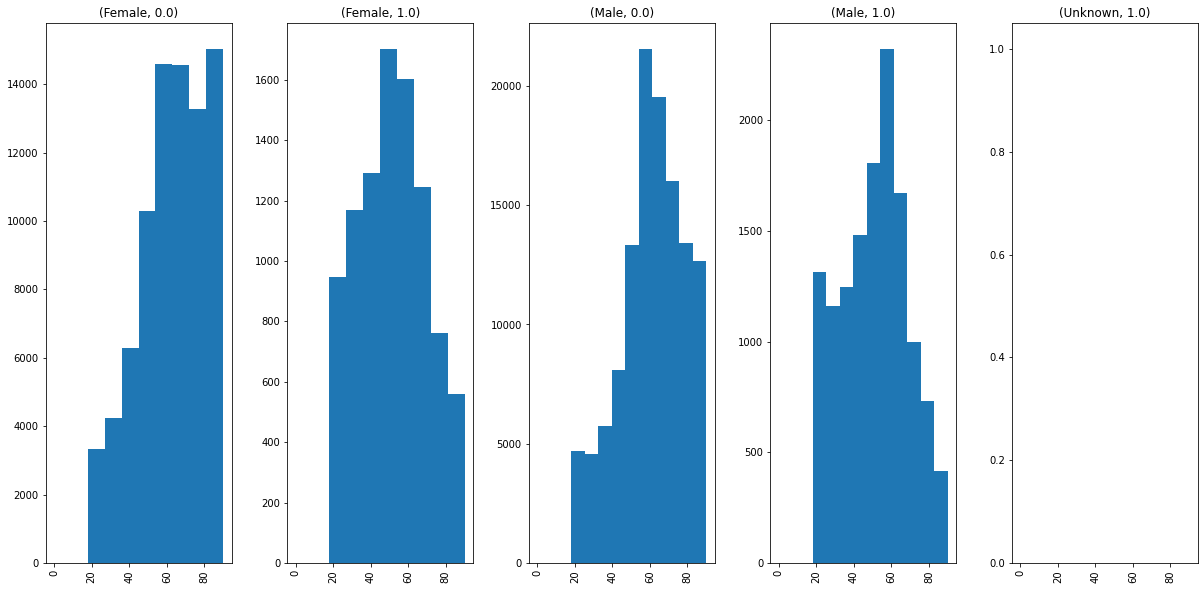

Enlarged Cardiomediastinum


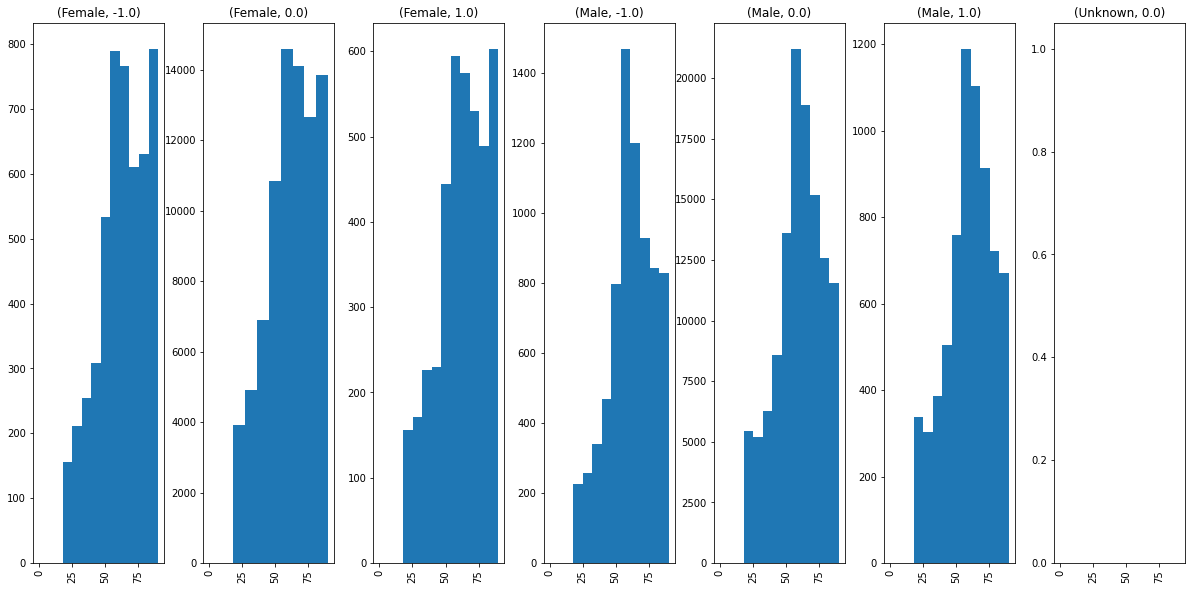

Cardiomegaly


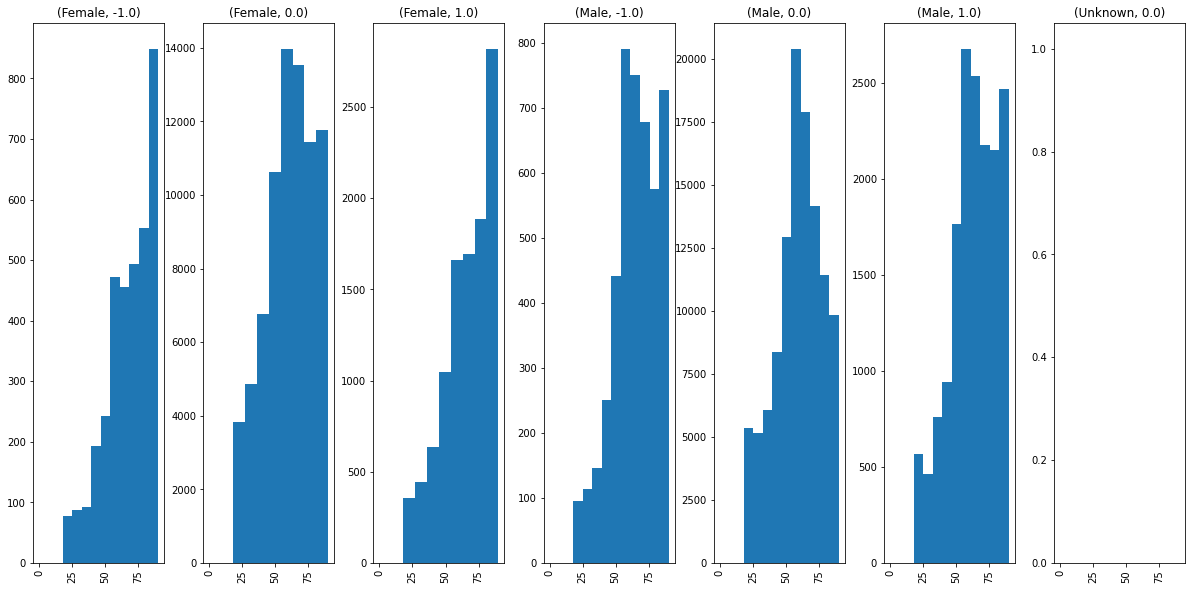

Lung Opacity


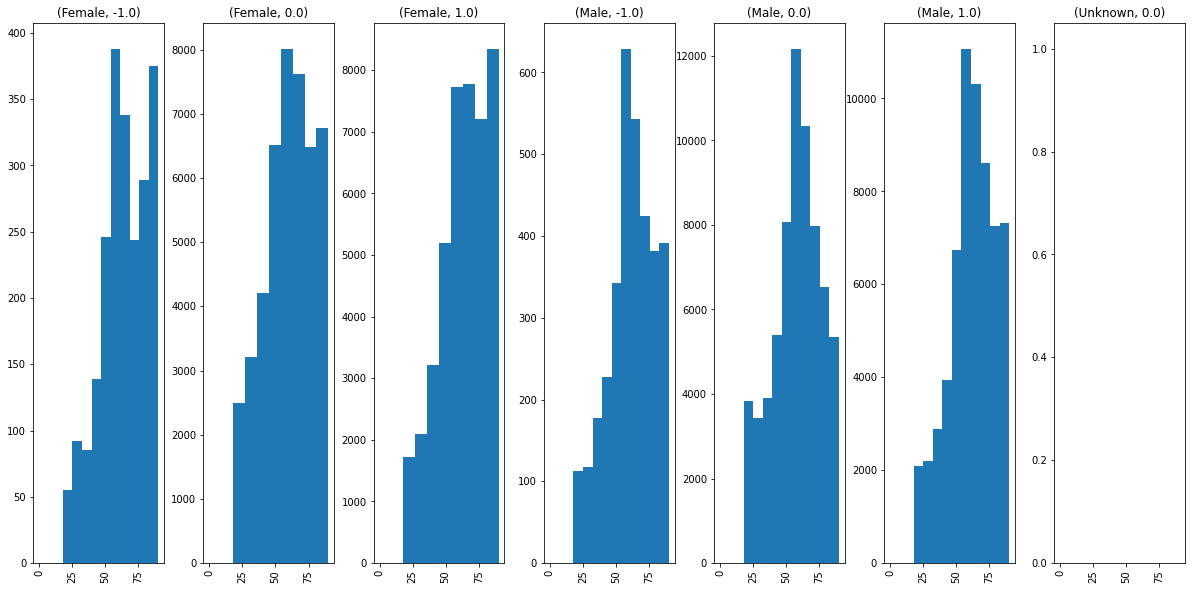

Lung Lesion


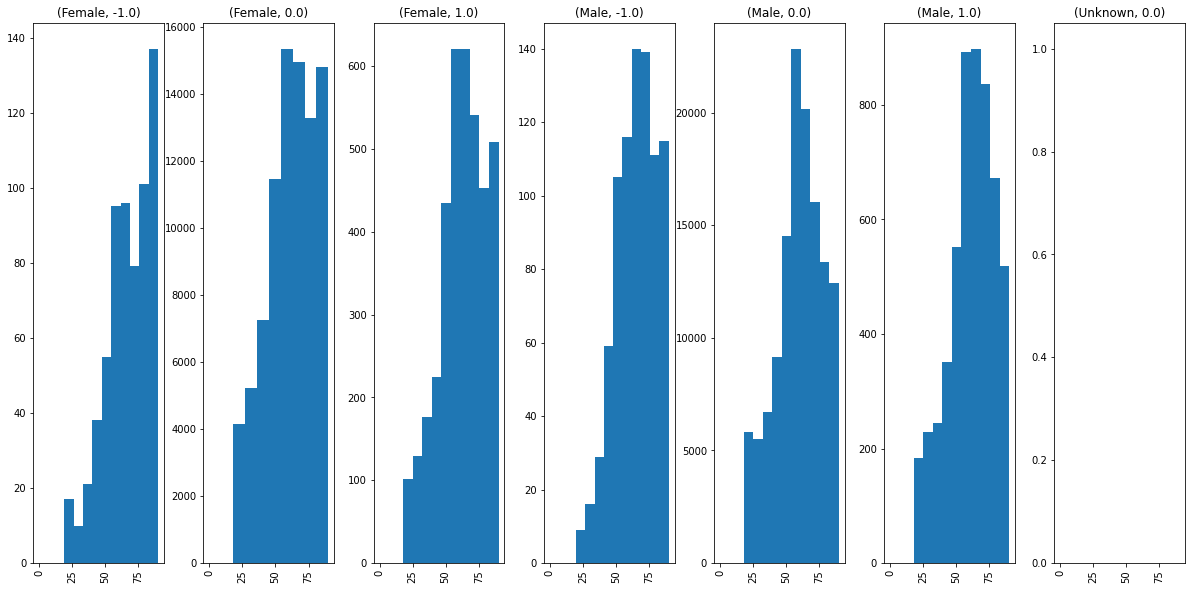

Edema


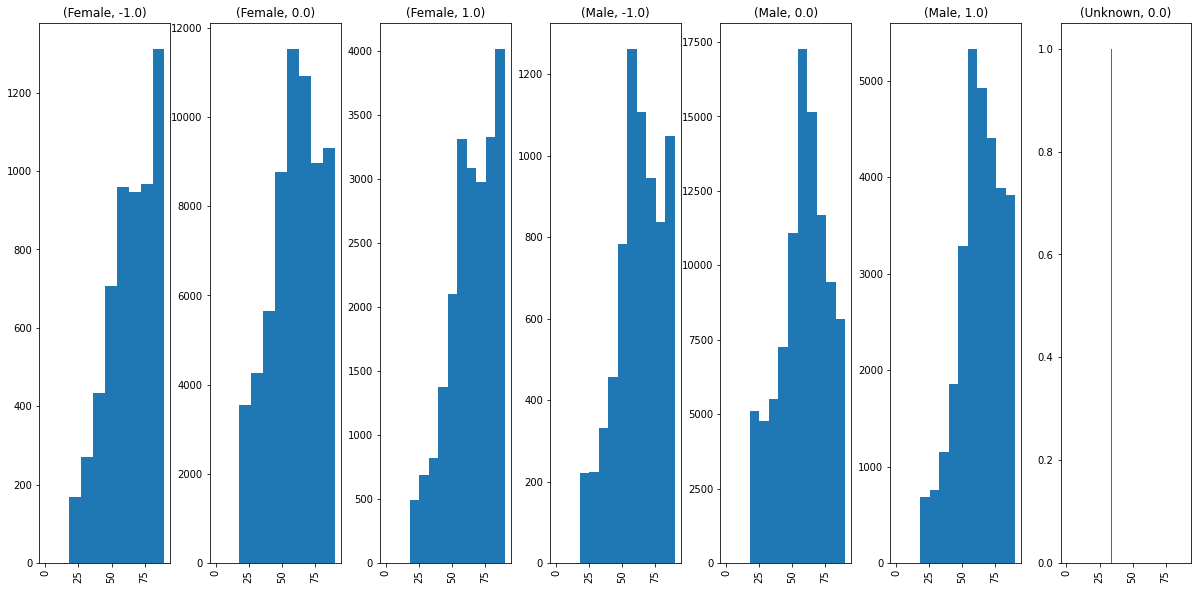

Consolidation


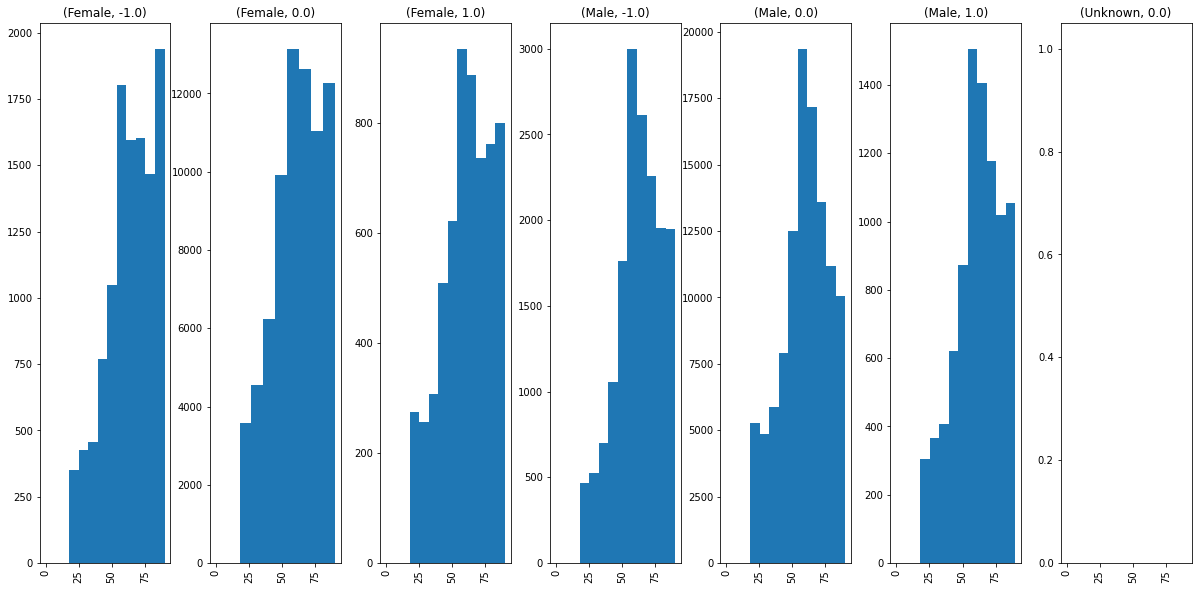

Pneumonia


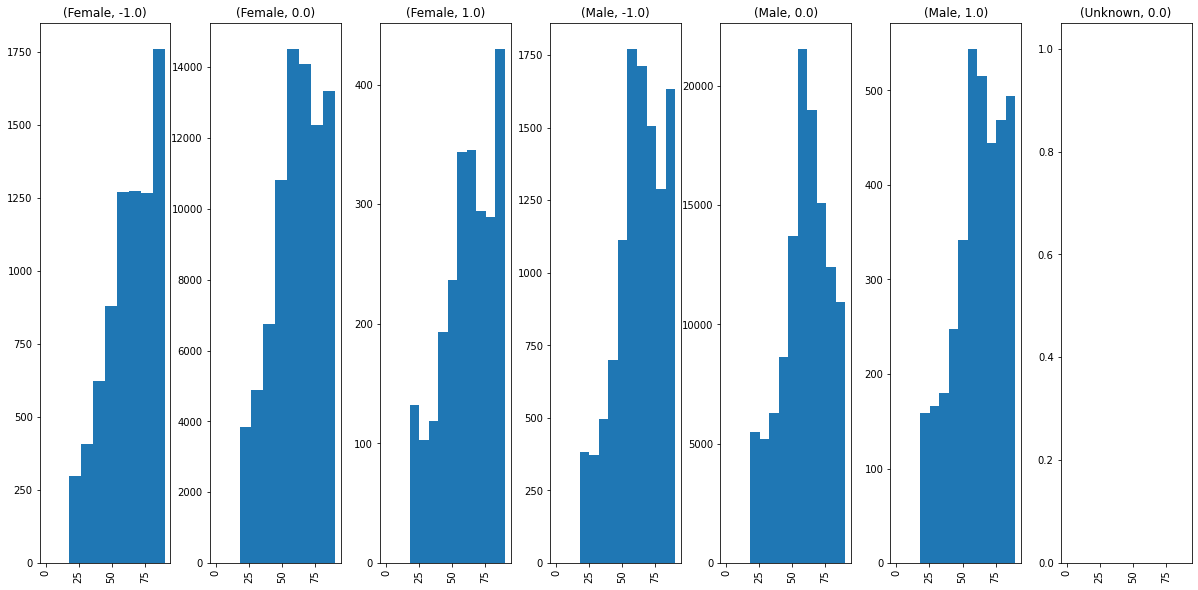

Atelectasis


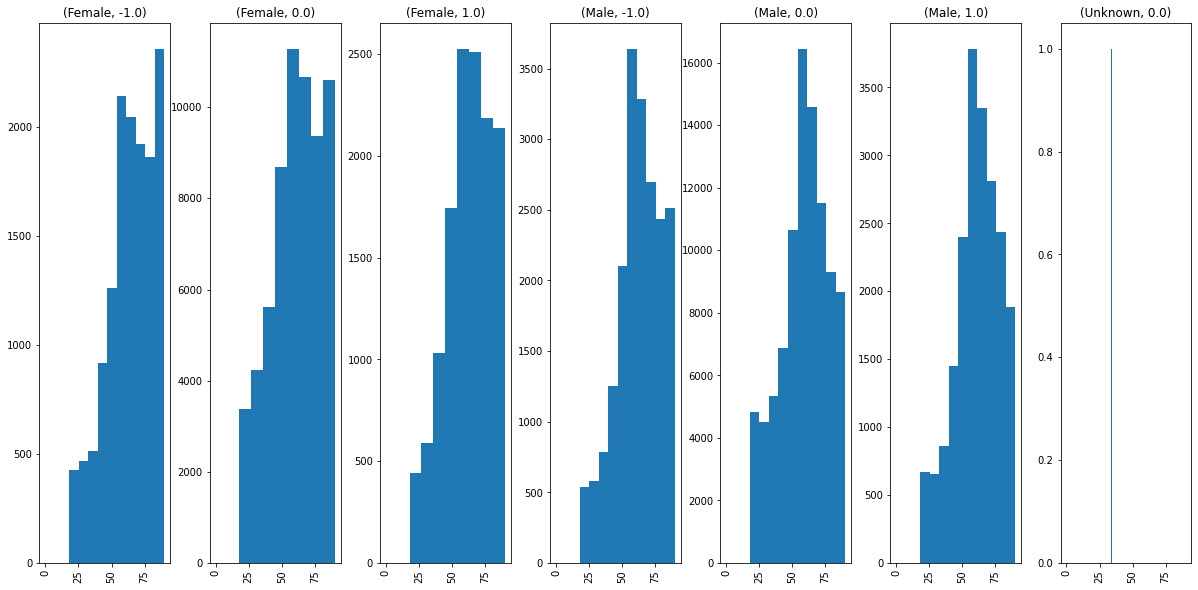

Pneumothorax


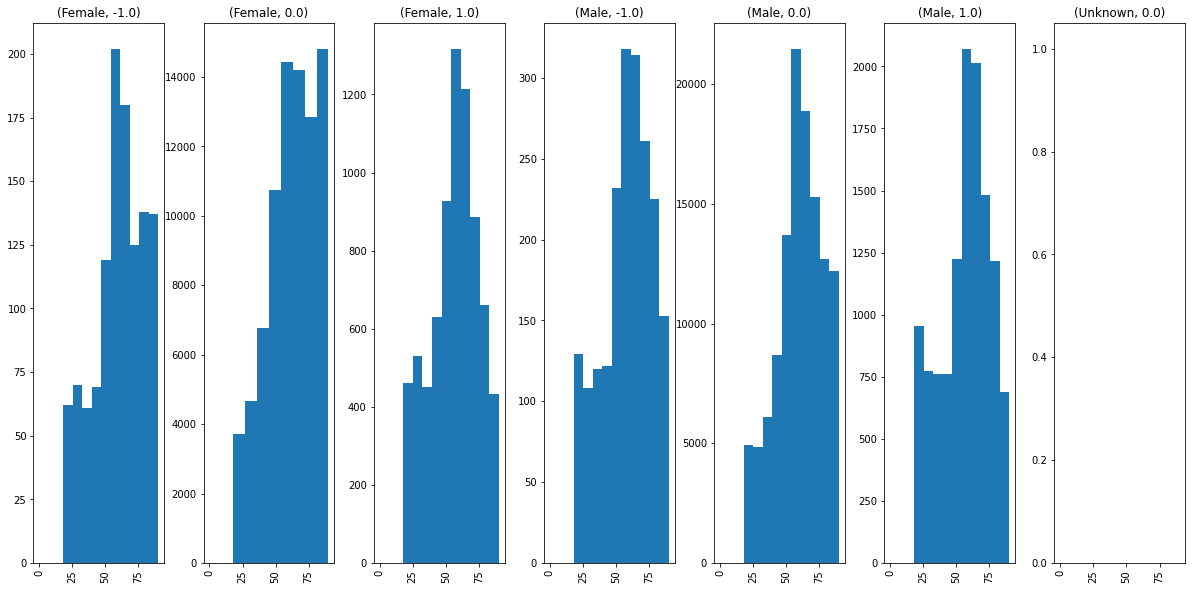

Pleural Effusion


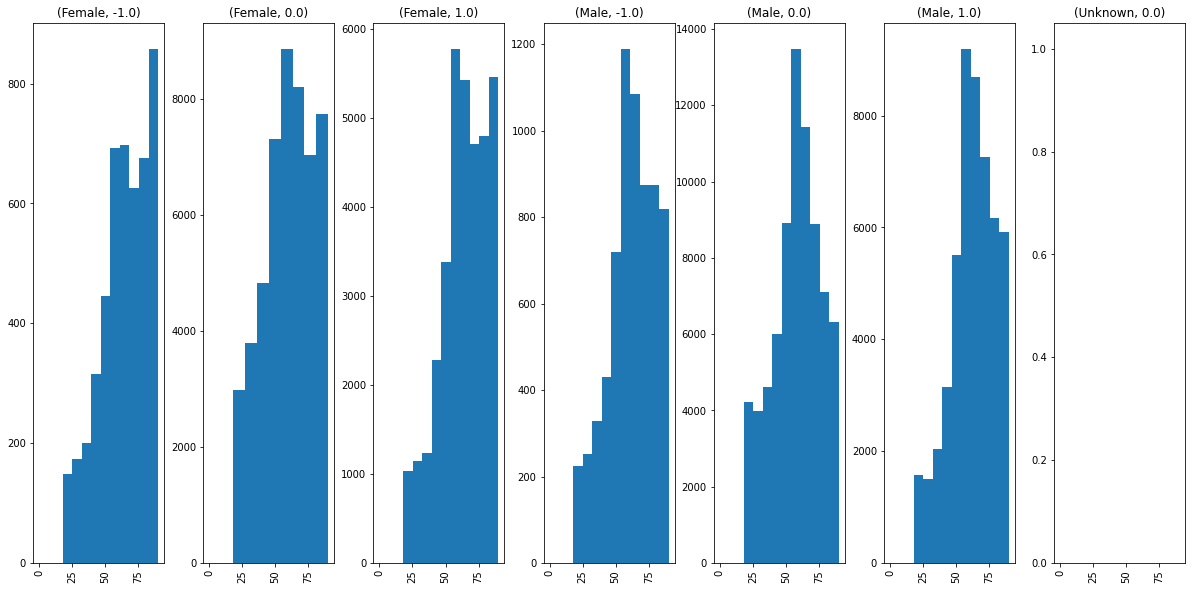

Pleural Other


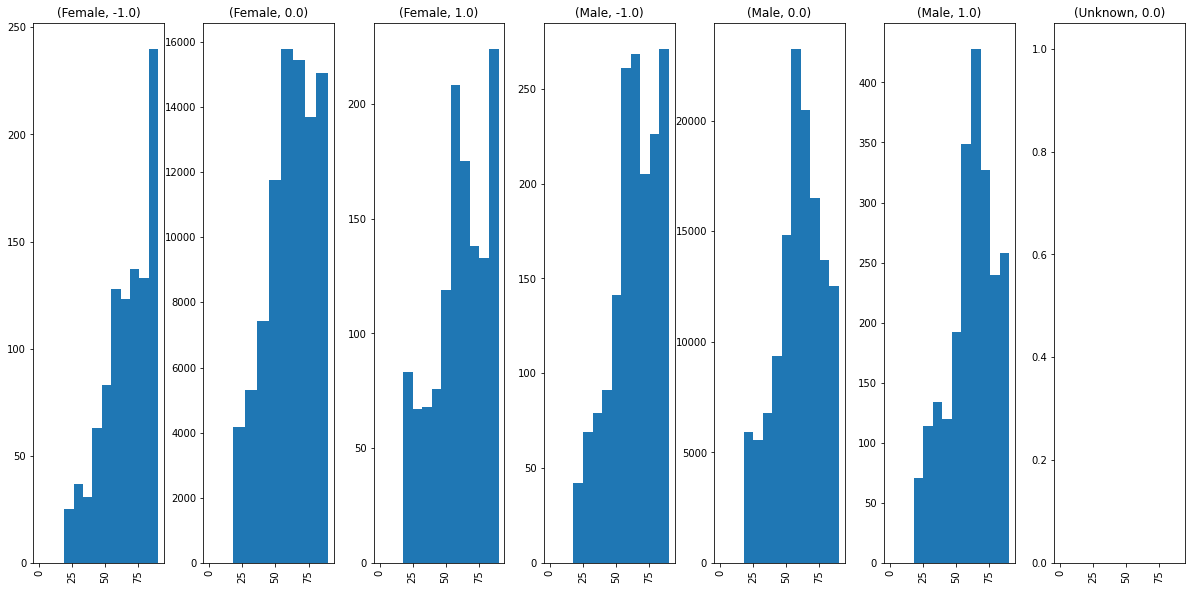

Fracture


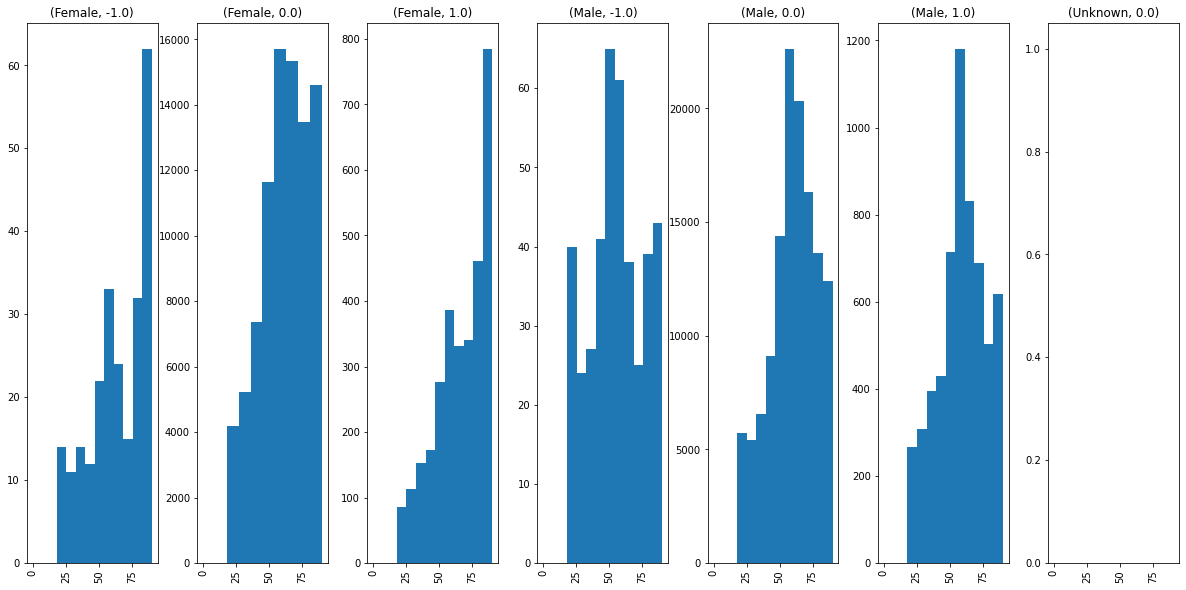

Support Devices


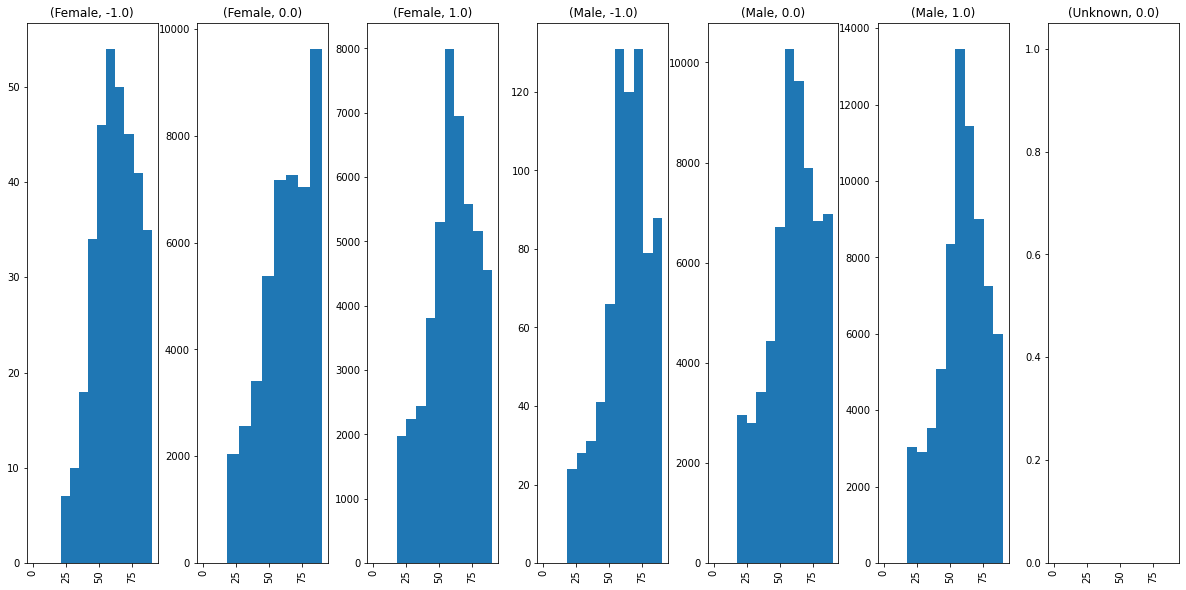

In [17]:
for col in signals_cols:
    print(col)
    plot = data.hist(column='Age', by=['Sex', col], figsize=(20,10), sharex=True, layout=(1,-1))
    plt.show()

## Percentage size by feature

In [53]:
for col in data.columns[1:]:
    print(col)
    size = data.groupby(col).size()
    print(size/size.sum())
    print()

Sex
Sex
Female    0.371643
Male      0.628357
dtype: float64

Age
Age
18.0    0.003007
19.0    0.003920
20.0    0.004333
21.0    0.005718
22.0    0.006544
          ...   
86.0    0.011083
87.0    0.006013
88.0    0.009609
89.0    0.009786
90.0    0.038909
Length: 73, dtype: float64

Frontal/Lateral
Frontal/Lateral
Frontal    0.865369
Lateral    0.134631
dtype: float64

AP/PA
AP/PA
-     0.141946
AP    0.735508
LL    0.000088
PA    0.122458
dtype: float64

No Finding
No Finding
0.0    0.904579
1.0    0.095421
dtype: float64

Enlarged Cardiomediastinum
Enlarged Cardiomediastinum
-1.0    0.054250
 0.0    0.879239
 1.0    0.066511
dtype: float64

Cardiomegaly
Cardiomegaly
-1.0    0.033621
 0.0    0.834148
 1.0    0.132231
dtype: float64

Lung Opacity
Lung Opacity
-1.0    0.019429
 0.0    0.489568
 1.0    0.491002
dtype: float64

Lung Lesion
Lung Lesion
-1.0    0.007315
 0.0    0.954645
 1.0    0.038040
dtype: float64

Edema
Edema
-1.0    0.056942
 0.0    0.703877
 1.0    0.239181
dtype: f

## Absolute size by feature

In [3]:
for col in data.columns[1:]:
    print(col)
    size = data.groupby(col).size()
    print(size)
    print()

Sex
Sex
Female      90777
Male       132636
Unknown         1
dtype: int64

Age
Age
0        3
18     766
19    1167
20    1287
21    1279
      ... 
86    2384
87    2357
88    2140
89    2024
90    7579
Length: 74, dtype: int64

Frontal/Lateral
Frontal/Lateral
Frontal    191027
Lateral     32387
dtype: int64

AP/PA
AP/PA
-      32387
AP    161590
LL        16
PA     29420
RL         1
dtype: int64

No Finding
No Finding
0.0    201033
1.0     22381
dtype: int64

Enlarged Cardiomediastinum
Enlarged Cardiomediastinum
-1.0     12403
 0.0    200213
 1.0     10798
dtype: int64

Cardiomegaly
Cardiomegaly
-1.0      8087
 0.0    188327
 1.0     27000
dtype: int64

Lung Opacity
Lung Opacity
-1.0      5598
 0.0    112235
 1.0    105581
dtype: int64

Lung Lesion
Lung Lesion
-1.0      1488
 0.0    212740
 1.0      9186
dtype: int64

Edema
Edema
-1.0     12984
 0.0    158184
 1.0     52246
dtype: int64

Consolidation
Consolidation
-1.0     27742
 0.0    180889
 1.0     14783
dtype: int64

Pneumoni

## Size without uncertainty

In [55]:
non_uncertainty_data = data[~(data == -1).any(axis=1)].reset_index()

for col in non_uncertainty_data.columns[1:]:
    print(col)
    size = non_uncertainty_data.groupby(col).size()
    print(size)
    print()

Path
Path
CheXphoto-test-v1.0/valid/synthetic/photographic/patient64541/study1/view1_frontal.jpg    1
CheXphoto-test-v1.0/valid/synthetic/photographic/patient64542/study1/view1_frontal.jpg    1
CheXphoto-test-v1.0/valid/synthetic/photographic/patient64542/study1/view2_lateral.jpg    1
CheXphoto-test-v1.0/valid/synthetic/photographic/patient64543/study1/view1_frontal.jpg    1
CheXphoto-test-v1.0/valid/synthetic/photographic/patient64544/study1/view1_frontal.jpg    1
                                                                                         ..
CheXphoto-v1.1/valid/synthetic/digital/patient64736/study1/view1_frontal.jpg              1
CheXphoto-v1.1/valid/synthetic/digital/patient64737/study1/view1_frontal.jpg              1
CheXphoto-v1.1/valid/synthetic/digital/patient64738/study1/view1_frontal.jpg              1
CheXphoto-v1.1/valid/synthetic/digital/patient64739/study1/view1_frontal.jpg              1
CheXphoto-v1.1/valid/synthetic/digital/patient64740/study1/view1_front

In [56]:
path_metadata = pd.DataFrame(data.Path.str.split('/').values.tolist())
path_metadata.head(5)

,0,1,2,3,4,5,6
0,CheXphoto-v1.0,train,synthetic,digital,patient00004,study1,view1_frontal.jpg
1,CheXphoto-v1.0,train,synthetic,digital,patient00004,study1,view2_lateral.jpg
2,CheXphoto-v1.0,train,synthetic,digital,patient00019,study1,view1_frontal.jpg
3,CheXphoto-v1.0,train,synthetic,digital,patient00019,study1,view2_lateral.jpg
4,CheXphoto-v1.0,train,synthetic,digital,patient00019,study4,view1_frontal.jpg


In [57]:
for col in path_metadata.columns[1:-3]:
    print(path_metadata.loc[path_metadata[1]=='train',:].groupby(col).size())
    print()

1
train    32521
dtype: int64

2
natural      11507
synthetic    21014
dtype: int64

3
digital         10507
iphone           1000
nokia           10507
photographic    10507
dtype: int64



In [71]:
for col in path_metadata.columns[4:]:
    print(path_metadata.loc[path_metadata[1]=='train',:].groupby(col).size())
    print()

5
study1     11772
study10      571
study11      460
study12      377
study13      327
           ...  
study83        3
study84        3
study85        3
study86        3
study9       695
Length: 86, dtype: int64

6
view1_frontal.jpg    27619
view1_lateral.jpg        3
view2_frontal.jpg      493
view2_lateral.jpg     4177
view3_lateral.jpg      229
dtype: int64

